In [1]:
import cortex
import matplotlib.pyplot as plt
import numpy as np
import cortex.polyutils
np.random.seed(1234)
from os.path import join as pjoin
import nilearn
from nilearn import datasets, surface

In [2]:
subj = 'subj01'
pic=11

### Loading Data

In [3]:
basedir = '/Users/yilewang/Downloads/'+subj
fmri_dir = pjoin(basedir, 'training_split/training_fmri')

# load npy file
lh_data = np.load(pjoin(fmri_dir, 'lh_training_fmri.npy'))
rh_data = np.load(pjoin(fmri_dir, 'rh_training_fmri.npy'))

print(lh_data.shape)

(9841, 19004)


### Masks

In [4]:
basedir = '/Users/yilewang/Downloads/'+subj
fmri_dir = pjoin(basedir, 'roi_masks')

# load npy file
lh_all_data = np.load(pjoin(fmri_dir, 'lh.all-vertices_fsaverage_space.npy'))
rh_all_data = np.load(pjoin(fmri_dir, 'rh.all-vertices_fsaverage_space.npy'))

print(lh_all_data.shape)

(163842,)


In [74]:
# count the number value over 1 in lh_all_data
count = 0
for i in range(lh_all_data.shape[0]):
    if lh_all_data[i] > 0:
        count += 1
print(count)

19004


In [75]:
import cortex
print(cortex.database.default_filestore)

/Users/yilewang/miniconda3/envs/tvbenv/share/pycortex/db


In [76]:
cortex.download_subject('fsaverage')

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/cortex/utils.py:1023: UserWarning: fsaverage is already present in the database. Set download_again to True if you wish to download the subject again.
  warnings.warn(


In [5]:
# Map the fMRI data onto the brain surface map
fsaverage_response_left = np.zeros(len(lh_all_data))
fsaverage_response_right = np.zeros(len(rh_all_data))
fsaverage_response_left[np.where(lh_all_data)[0]] = lh_data[pic]
fsaverage_response_right[np.where(rh_all_data)[0]] = rh_data[pic]

In [8]:
print(np.where(lh_all_data)[0])

[     6      7     32 ... 163061 163062 163063]


In [78]:
163842*2

327684

In [87]:
def zoom_to_roi(subject, roi, margin=10.0):
    roi_verts = cortex.get_roi_verts(subject)
    index_roi_verts = []
    for i in roi:
        for j in range(len(roi_verts[i])):
            index_roi_verts.append(roi_verts[i][j])
    index_roi_verts = np.array(index_roi_verts).flatten()

    roi_map = cortex.Vertex.empty(subject)
    roi_map.data[index_roi_verts] = 1

    (lflatpts, lpolys), (rflatpts, rpolys) = cortex.db.get_surf(subject, "flat",
                                                                nudge=True)
    print(lflatpts)
    print(lflatpts.min(0), lflatpts.max(0))

    print(lpolys)
    print(lpolys.min(0), lpolys.max(0))

    sel_pts = np.concatenate([lflatpts, rflatpts], axis=0)
    roi_pts = sel_pts[np.nonzero(roi_map.data)[0], :2]



    xmin, ymin = roi_pts.min(0) - margin
    xmax, ymax = roi_pts.max(0) + margin
    plt.axis([xmin, xmax, ymin, ymax])

[[-160.51022    69.7099      0.      ]
 [ -77.65223    61.85971     0.      ]
 [-186.98564   116.89054     0.      ]
 ...
 [ -92.03801   -98.51233     0.      ]
 [ -91.83873   -98.03574     0.      ]
 [ -91.66301   -97.451195    0.      ]]
[-312.02316  -140.45442   -38.664425] [  0.       140.45442   58.976177]
[[     0  40964  40962]
 [     0  40962  40965]
 [     0  40965  40967]
 ...
 [163841 160926  39990]
 [163113 160926 163841]
 [163113     11 160926]]
[0 1 1] [163841 163841 163841]


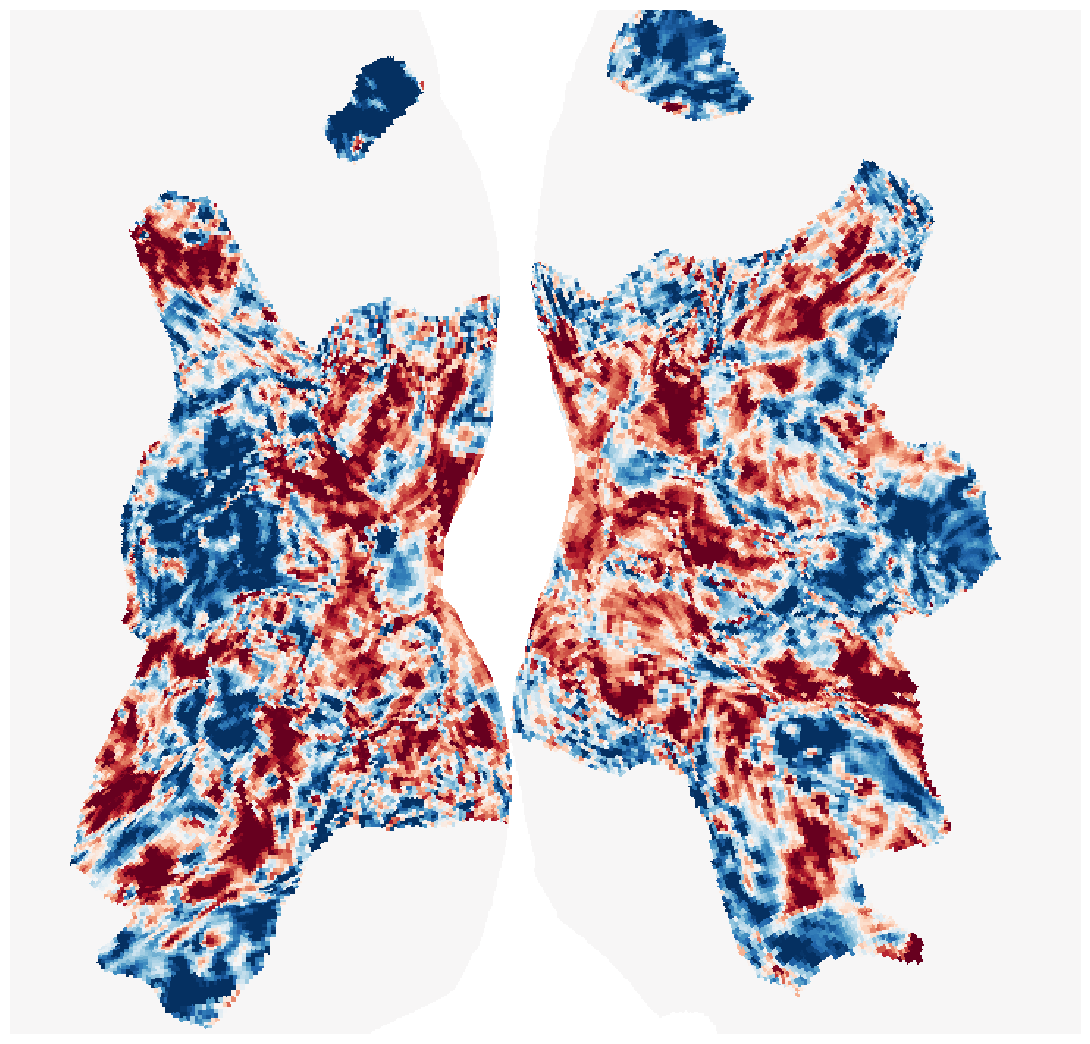

In [88]:
value = np.concatenate((fsaverage_response_left, fsaverage_response_right))
vertex_data = cortex.Vertex(value, 'fsaverage', cmap='RdBu_r', vmin=-1, vmax=1)
cortex.quickflat.make_figure(vertex_data, with_curvature=True, with_labels=False, with_rois=False, with_colorbar=False)
# Zoom on just regions
visual_areas = ['PPA', 'FFA', 'OFA', 'SPL1', 'IPS5', 'IPS4', 'IPS3', 'IPS2', 'IPS1', 'IPS0', 'VO2', 'VO1', 'MST', 'hMT', 'LO2', 'LO1', 'V4', 'V3B', 'V3A', 'V3', 'V2', 'V1']
zoom_to_roi('fsaverage', visual_areas)
# plt.title(f'subj = {subj}; pic_id = {pic}')